# ADA Final Exam 2017

**Design the pockedex 2.0**

## Imports

In [149]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set_context('notebook')

## Question 1

### Part 1

#### Load Data


In [2]:
pokemons = pd.read_csv('pokemon.csv').rename(columns={'Class 1': 'Class_1', 'Class 2': 'Class_2'})
combats = pd.read_csv('combats.csv')

# Print head of each tables
display(pokemons.head(5))
display(combats.head(5))

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


#### Useful statistics

In [3]:
# Display generics statistic about the loaded data
display(pokemons.describe())
display(combats.describe())

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [4]:
nb_unique_class = pd.concat([pokemons.Class_1, pokemons.Class_2]).dropna().unique().size

print(f'There is {nb_unique_class} different classes.')

There is 18 different classes.


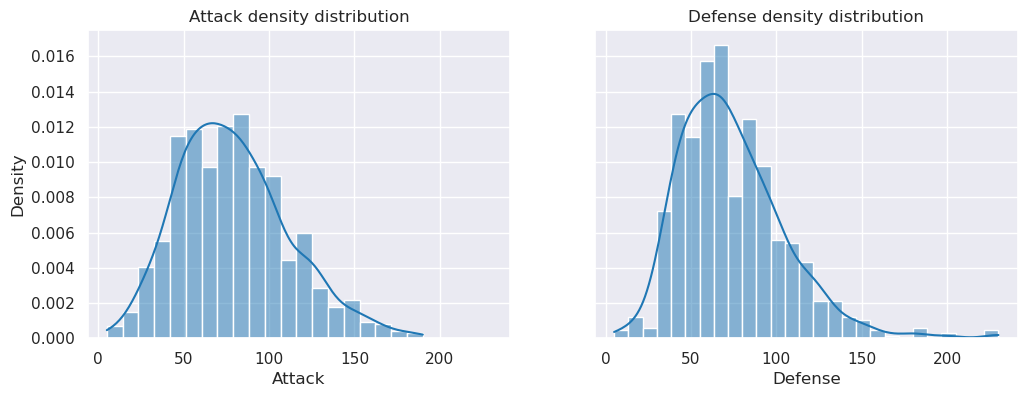

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
sns.histplot(data=pokemons, x='Attack', stat='density', ax=axs[0], kde=True)
axs[0].set_title('Attack density distribution')
sns.histplot(data=pokemons, x='Defense', stat='density', ax=axs[1], kde=True)
axs[1].set_title('Defense density distribution')
plt.show()

### Part 2

##### i.

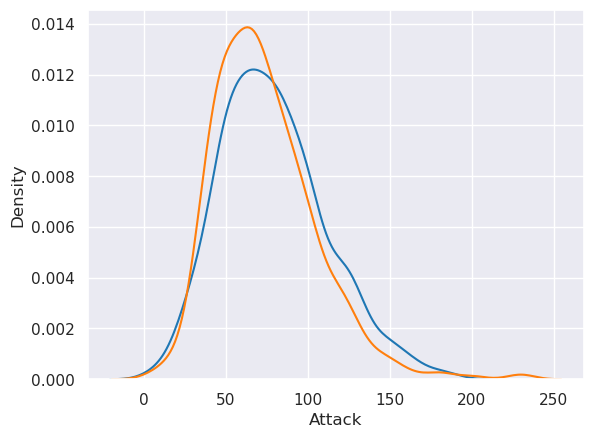

In [6]:
# Show the relation by overlapping distribution
sns.kdeplot(data=pokemons, x='Attack')
sns.kdeplot(data=pokemons, x='Defense')

plt.show()

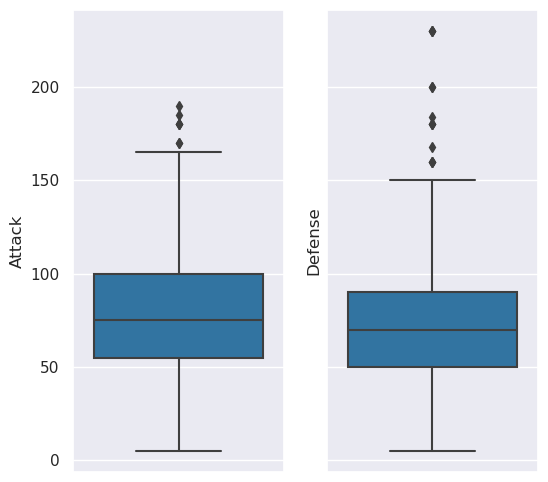

In [7]:
# Show the relation by using boxplots
fig, axs = plt.subplots(1, 2, figsize=(6, 6), sharey=True, sharex=True)
sns.boxplot(data=pokemons, y='Attack', ax=axs[0])
sns.boxplot(data=pokemons, y='Defense', ax=axs[1])
plt.show()

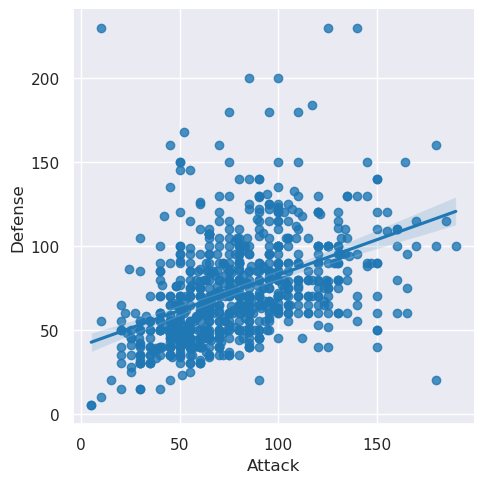

In [8]:
sns.lmplot(data=pokemons, x='Attack', y='Defense')
plt.show()

##### ii.

In [9]:
## Add the ratio to the dataframe
pokemons_with_attack_defense_ratio = pokemons.copy()
pokemons_with_attack_defense_ratio['ratio_attack_defense'] = pokemons_with_attack_defense_ratio.apply(
    func=lambda row: row['Attack'] / row['Defense'], axis=1)
ordered_attack_over_defense = pokemons_with_attack_defense_ratio[['Name', 'ratio_attack_defense']].sort_values(
    by='ratio_attack_defense', ascending=False)

three_highest_ratio: pd.Series = ordered_attack_over_defense.iloc[:3]['Name']
print('The three pokemon with the highest ratio of Attack over Defense are:')
for idx, entry in three_highest_ratio.items():
    print(f'\t - {entry}')

The three pokemon with the highest ratio of Attack over Defense are:
	 - DeoxysAttack Forme
	 - Carvanha
	 - Mega Beedrill


##### iii.

In [10]:
three_lowest_ratio = ordered_attack_over_defense.iloc[-3:]['Name']
print('The three pokemon with the lowest ratio of Attack over Defense are:')
for idx, entry in three_lowest_ratio.items():
    print(f'\t - {entry}')

The three pokemon with the lowest ratio of Attack over Defense are:
	 - Bronzor
	 - Magikarp
	 - Shuckle


##### iv.

In [11]:
combats_winners = combats.groupby('Winner')
nb_victory = combats_winners['Winner'].count().rename('nb_victory')
pokemons_with_victories = pokemons[['pid', 'Name']].merge(nb_victory, how='inner', left_on='pid', right_index=True)

ordered_pokemon_victory = pokemons_with_victories[['Name', 'nb_victory']].sort_values(by='nb_victory', ascending=False)
print('The ten pokemon that have won the most battle are:')
for idx, entry in ordered_pokemon_victory[:10]['Name'].items():
    print(f'\t - {entry}')

The ten pokemon that have won the most battle are:
	 - Mewtwo
	 - Aerodactyl
	 - Infernape
	 - Jirachi
	 - Deoxys Speed Forme
	 - Slaking
	 - Murkrow
	 - Mega Absol
	 - Mega Houndoom
	 - Mega Aerodactyl


### Part 3

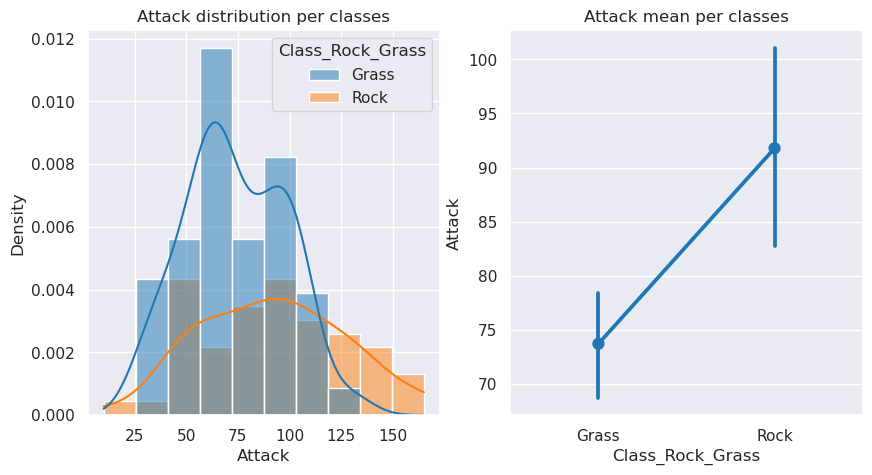

In [12]:
# Get the data
grass_rock_pokemons = pokemons.query(
    '(Class_1 == "Grass" and Class_2 != "Rock") or (Class_1 == "Rock" and Class_2 != "Grass") or (Class_1 != "Grass" and Class_2 == "Rock") or (Class_1 != "Rock" and Class_2 == "Grass")').copy()

grass_rock_pokemons['Class_Rock_Grass'] = grass_rock_pokemons.apply(
    lambda row: "Grass" if row['Class_1'] == "Grass" or row['Class_2'] == "Grass" else "Rock", axis=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), )

# Plot the distribution of both
sns.histplot(data=grass_rock_pokemons, x='Attack', stat='density', hue='Class_Rock_Grass', bins=10, kde=True, ax=axs[0])
axs[0].set_title('Attack distribution per classes')

# Plot the mean 
sns.pointplot(x="Class_Rock_Grass", y="Attack", data=grass_rock_pokemons, errorbar=('ci', 95), ax=axs[1])
axs[1].set_title('Attack mean per classes')

plt.show()

In [13]:
# Split 'Grass' and 'Rock' Pokémon
grass_pokemons = grass_rock_pokemons.query('Class_Rock_Grass == "Grass"').Attack.copy()
rock_pokemons = grass_rock_pokemons.query('Class_Rock_Grass == "Rock"').Attack.copy()

# Compute the means and standard deviation of both categories
[mean_grass_attack, std_grass_attack] = grass_pokemons.agg(['mean', 'std'])
[mean_rock_attack, std_rock_attack] = rock_pokemons.agg(['mean', 'std'])

# Calculate confidence interval using normal distribution with scipy library 
cf_mean_grass_attack_inf, cf_mean_grass_attack_sup = scp.norm.interval(confidence=0.95, loc=mean_grass_attack,
                                                                       scale=std_grass_attack / np.sqrt(
                                                                           len(grass_pokemons)))
cf_mean_rock_attack_inf, cf_mean_rock_attack_sup = scp.norm.interval(confidence=0.95, loc=mean_rock_attack,
                                                                     scale=std_rock_attack / np.sqrt(
                                                                         len(grass_pokemons)))

ttest = scp.ttest_ind(grass_pokemons, rock_pokemons, equal_var=False)

print(
    f'\tThe mean of grass class attack is {mean_grass_attack:.3f}, with a 95% confidence interval of [{cf_mean_grass_attack_inf:.3f}, {cf_mean_grass_attack_sup:.3f}]')
print(
    f'\tThe mean of the rock class attack is {mean_rock_attack:.3f}, with a 95% confidence interval of [{cf_mean_rock_attack_inf:.3f}, {cf_mean_rock_attack_sup:.3f}]')

print('\nt-test result:\n==========================')
print(f'\tt-statistic: {ttest[0]:.3f},\n'
      f'\tp-value: {ttest[1]:.5f}')

	The mean of grass class attack is 73.731, with a 95% confidence interval of [68.817, 78.645]
	The mean of the rock class attack is 91.786, with a 95% confidence interval of [84.712, 98.859]

t-test result:
	t-statistic: -3.417,
	p-value: 0.00096


As we can see on the graph, the 95% confidence intervals of both means don't overlap, which means that the difference in means is statistically significant.

To ensure the correctness, both intervals have been calculated, along with the p-value of the t-test statistic. The p-value $0.00096 < 0.05$, which mean that both means being different is statistically significant.

## Question 2

#### Part 1

In [133]:
# Bring data from pokémon matrix to have all the featurs in the 
combats_fst_with_info = combats.merge(pokemons, left_on='First_pokemon', right_on='pid')
combats_snd_with_info = combats.merge(pokemons, left_on='Second_pokemon', right_on='pid')
combats_with_info = combats_fst_with_info.join(combats_snd_with_info, how='inner', lsuffix='_first', rsuffix='_second')

# 1 If first is the winner, 0 if second is the winner
combats_with_info['Winner'] = combats_with_info.apply(lambda row: 1 if row['First_pokemon_first'] == row['Winner_first'] else 0, axis=1)

# keep only interesting columns = 
combats_with_info.drop(
    ['First_pokemon_first', 'Second_pokemon_first', 'First_pokemon_second', 'Second_pokemon_second', 'Winner_first', 'Winner_second',
     'pid_first', 'pid_second', 'Name_first', 'Name_second'], axis=1, inplace=True)

combats_with_info_onehot = pd.get_dummies(combats_with_info, columns=['Class_1_first', 'Class_2_first'], dtype=int,
                                          prefix='onehot_first', prefix_sep='-')
combats_with_info_onehot = pd.get_dummies(combats_with_info_onehot, columns=['Class_1_second', 'Class_2_second'],
                                          dtype=int, prefix='onehot_second', prefix_sep='-')

# Convert bool type in int
combats_with_info_onehot = combats_with_info_onehot.astype({'Legendary_first': int, 'Legendary_second': int})

#
X = combats_with_info_onehot.drop('Winner', axis=1).copy()
y = combats_with_info_onehot['Winner'].copy()

print("The feature matrix is:")
display(X.head())
print("The labels vector is:")
display(y.head())

The feature matrix is:


,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Legendary_first,HP_second,Attack_second,Defense_second,...,onehot_second-Ghost,onehot_second-Grass,onehot_second-Ground,onehot_second-Ice,onehot_second-Normal,onehot_second-Poison,onehot_second-Psychic,onehot_second-Rock,onehot_second-Steel,onehot_second-Water
0,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
1,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
2,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
3,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
4,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0


The labels vector is:


0    0
1    0
2    1
3    0
4    0
Name: Winner, dtype: int64

### Part 2

For categorical features like *Legendary*, I simply converted it to an int, to use a 1 for True, and a 0 for False.

For categorical data like the name, it seemed to me like it wasn't relevant to predict the winner, so I removed it from the training data.

And finally for the Pokémon classes, I used a onehot encoding of the feature. A 1 telling that the pokémon was part of this class, and a 0 to tell it wasn't.

### Part 3

In [137]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [138]:
n_estimators = [10, 25, 50, 100]
max_depths = [2, 4, 10]
predictions = []
for n_estimator in n_estimators:
    for max_depth in max_depths:
        random_forest = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)
        predictions.append(y_pred)
        

In [139]:
print("Prediction vectors for each of the different models")
display(predictions)

Prediction vectors for each of the different models


[array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 1, 1])]

### Part 4

In [153]:
metrics = [(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)) for y_pred in predictions]

print("Metrics calculated for the different predictions:"
      "\n=================================================")
for n_estimator_idx, n_estimator in enumerate(n_estimators):
    for max_depth_idx, max_depth in enumerate(max_depths):
        accuracy, precision, recall, f1 = metrics[n_estimator_idx * len(max_depths) + max_depth_idx]
        print(f"n_estimator {n_estimator} - max_depth {max_depth}")
        print(f"\t - Accuracy: {accuracy}\n"
              f"\t - Precision: {precision}\n"
              f"\t - Recall: {recall}\n"
              f"\t - F1-Score: {f1}")
    

Metrics calculated for the different predictions:
n_estimator 10 - max_depth 2
	 - Accuracy: 0.6788
	 - Precision: 0.6968278731149246
	 - Recall: 0.5670757511637748
	 - F1-Score: 0.6252916472235184
n_estimator 10 - max_depth 4
	 - Accuracy: 0.7254
	 - Precision: 0.726027397260274
	 - Recall: 0.6728734659331358
	 - F1-Score: 0.6984405886228859
n_estimator 10 - max_depth 10
	 - Accuracy: 0.725
	 - Precision: 0.7317073170731707
	 - Recall: 0.6601777401608125
	 - F1-Score: 0.6941045606229144
n_estimator 25 - max_depth 2
	 - Accuracy: 0.7266
	 - Precision: 0.7475149105367793
	 - Recall: 0.6364790520524757
	 - F1-Score: 0.6875428571428571
n_estimator 25 - max_depth 4
	 - Accuracy: 0.726
	 - Precision: 0.7356430944470812
	 - Recall: 0.655945831570038
	 - F1-Score: 0.6935123042505593
n_estimator 25 - max_depth 10
	 - Accuracy: 0.7264
	 - Precision: 0.7308584686774942
	 - Recall: 0.6665256030469742
	 - F1-Score: 0.697211155378486
n_estimator 50 - max_depth 2
	 - Accuracy: 0.7102
	 - Precision: 

In [156]:
pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-score']).agg(lambda col: np.argmax(col))

Accuracy     10
Precision     9
Recall        1
F1-score      1
dtype: int64

### Part 5

Yes, it might not be completely accurate, as we leave out 10% of the dataset for training, and we test only on 10% of the data. A preferred approach to choose hyperparameter, is to use cross validation. This way we use 100% of the data as train data, and 100% of the data as test data as well. So we are more robust to choose the hyperparameter correctly.

In [ ]:
precision = cross_val_score(random_forest, X_train, y_train, cv=10, scoring="precision")
precisions.append(precision.mean())
recall = cross_val_score(random_forest, X, y, cv=10, scoring="recall")
recalls.append(recall.mean())

# Precision: avoid false positives
print("Precision forest %i trees: %0.2f (+/- %0.2f)" % (i, precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall forest %i trees: %0.2f (+/- %0.2f)" % (i, recall.mean(), recall.std() * 2))
print('========================================')